# Kernel Ridge Regression Analysis

This Jupyter Notebook demonstrates the process of performing Kernel Ridge Regression on a dataset retrieved from a remote database. The notebook includes the following steps:

1. **Importing Necessary Libraries**: Importing essential libraries and modules required for data manipulation, database connection, and kernel ridge regression.
2. **Database Connection**: Establishing a connection to a remote database to fetch the desired dataset.
3. **Data Preparation**: Loading the dataset into a pandas DataFrame and preparing the data for regression analysis.
4. **Kernel Functions**: Defining various kernel functions such as Gaussian, Polynomial, Linear, and Logistic kernels.
5. **Kernel Ridge Regression**: Applying Kernel Ridge Regression using the defined kernel functions and visualizing the results.

This notebook is designed to provide a comprehensive guide for performing Kernel Ridge Regression, making it easier for readers to understand and implement the process in their own projects.

In [1]:
import sys
sys.path.append('..')
import os
import dotenv
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import src.kernel_ridge as kr

In [2]:
dotenv.load_dotenv()

True

#### Connection to remote database

In [11]:
dict_data_frame = {1: ('df_regresion_nolineal_1','x','y'),
                   2: ('df_regresion_nolineal_2','x','y'),
                   3: ('df_regresion_nolineal_3','x','y'),
                   4: ('temp','fecha','temp'),}
desired_dataset = 4

In [12]:
connection = mysql.connector.connect(
    host=os.getenv('DB_HOST'),
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    database=os.getenv('DB_NAME')
)

In [13]:
cursor = connection.cursor()
cursor.execute('SELECT * FROM {}'.format("sistemas_inteligentes_iv."+ dict_data_frame[desired_dataset][0]))
datos = cursor.fetchall()
cursor.close()
connection.close()

In [14]:
data_frame = pd.DataFrame(datos, columns=['id', dict_data_frame[desired_dataset][1], dict_data_frame[desired_dataset][2]])
data_frame.drop(columns=['id'], inplace=True)
print(data_frame)

       fecha  temp
0        1.0  26.2
1        2.0  26.7
2        3.0  26.2
3        4.0  26.7
4        5.0  26.2
...      ...   ...
3356  3357.0  86.7
3357  3358.0  86.2
3358  3359.0  87.2
3359  3360.0  86.7
3360  3361.0  86.7

[3361 rows x 2 columns]


In [15]:
y = data_frame[dict_data_frame[desired_dataset][2]].to_numpy().reshape(-1, 1)   
x = data_frame[dict_data_frame[desired_dataset][1]].to_numpy().reshape(-1, 1)
x.shape, y.shape

((3361, 1), (3361, 1))

In [ ]:
# Gaussian Kernel
def gaussian_kernel(x, y, sigma=1):
    return np.exp(-np.linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

# Polynomial Kernel
def polynomial_kernel(x, y, p=2):
    return (1 + np.dot(x, y)) ** p

# Linear Kernel
def linear_kernel(x, y):
    return np.dot(x, y)

# Logistic Kernel
def logistic_kernel(x, y):
    return np.tanh(np.dot(x, y))

(100, 1)


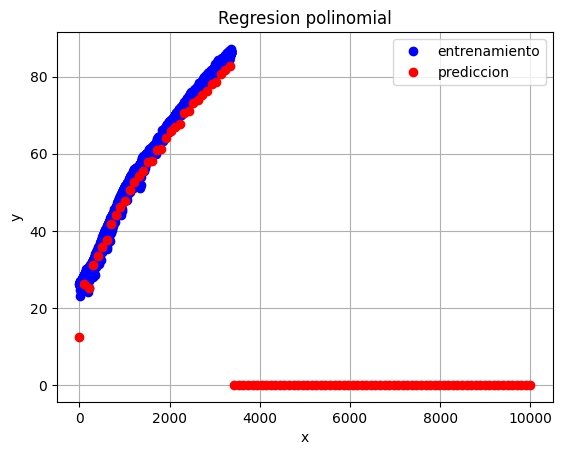

In [ ]:
X_test = np.linspace(0, 10000, 100).reshape(-1, 1)
prediciones = kr.kernel_ridge_efficient(X = x,y=y,kernel_type='gaussian',gamma = 1,X_test = X_test)
print(prediciones.shape)

kr.plot_kernel_ridge(x, y, X_test,prediciones)